In [1]:
import pandas as pd
import numpy as np 
import itertools
import re
import matplotlib.pyplot as plt
from matplotlib import style

def StringMatrixGen(data,StringIndex,DropByLength,SplitOn,DropVolumePercent):
    s1 = data.iloc[:,StringIndex].str.split(pat=SplitOn, expand=False)
    s= list(itertools.chain(*s1))
    s2=re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|))', str(s)) 
    s_unique = list(dict.fromkeys(s2))
    s_unique2=[ elem for elem in s_unique if len(elem) >DropByLength ]
    for substring in s_unique2:
        data[substring]= np.where(data.iloc[:,StringIndex].str.contains(substring),1,0)
    data= data.loc[:, (data==0).mean() < (100-DropVolumePercent)/100]
    return data

#data = dataframe with string variable as a column
#StringIndex = Index of column that contains the string
#DropByLength = Drop string features that have string less than this integer
#SplitOn= character to split the index on before splitting to words for e.g "|" , "."  "_", etc. Must be accompanied by ""
#DropVolumePercent = Drop string feature if it has a total volume of less than this integer in % terms. Enter 5 for 5%

In [2]:
df = pd.read_csv("calltype_samples.csv")
newdf= StringMatrixGen(df,0,2,"_",5)
len(newdf.columns)

20

In [3]:
#regression tree with default parameters 
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 1300)
regressor.fit(newdf.iloc[:,2:30], newdf.AHT) 
regressor.feature_importances_

array([0.10838224, 0.0250205 , 0.358099  , 0.03834079, 0.0135217 ,
       0.02204944, 0.00073748, 0.00984573, 0.00906748, 0.04890016,
       0.09429375, 0.1376383 , 0.00604716, 0.09446843, 0.        ,
       0.0060518 , 0.02753604, 0.        ])

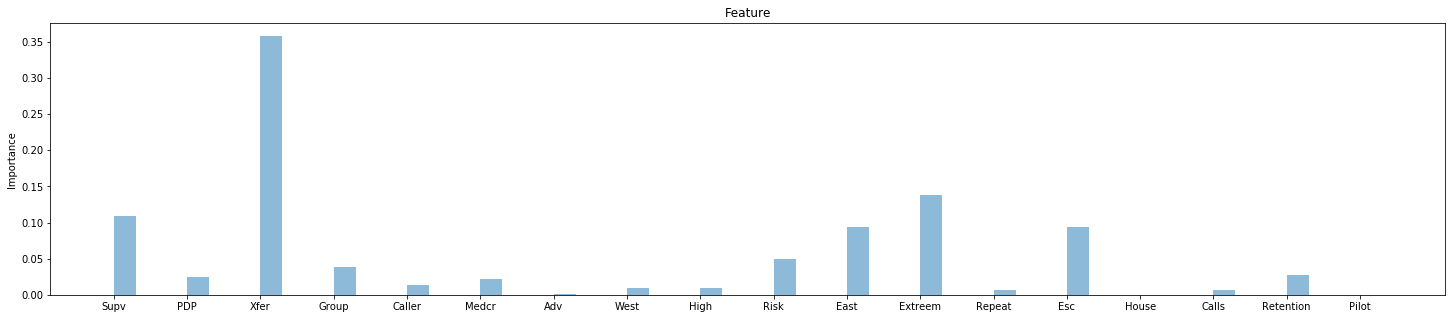

In [12]:
plt.figure(figsize=(25, 5)) 
plt.bar(newdf.columns[2:(len(newdf.columns)+1)], regressor.feature_importances_, align='edge', alpha=0.5, width=0.3)
plt.ylabel('Importance')
plt.title('Feature')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=15) 
plt.show()